In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_set/Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df1 = df.rename(columns = {'Length1':'Verticallen','Length2':'Diagonallen','Length3':'Crosslen'})

In [5]:
df1

,Species,Weight,Verticallen,Diagonallen,Crosslen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:

df_numeric = df1[['Weight','Verticallen','Diagonallen','Crosslen','Height','Width']]
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

               Weight  Verticallen  Diagonallen  Crosslen    Height     Width
Weight       1.000000     0.915712     0.918618  0.923044  0.724345  0.886507
Verticallen  0.915712     1.000000     0.999517  0.992031  0.625378  0.867050
Diagonallen  0.918618     0.999517     1.000000  0.994103  0.640441  0.873547
Crosslen     0.923044     0.992031     0.994103  1.000000  0.703409  0.878520
Height       0.724345     0.625378     0.640441  0.703409  1.000000  0.792881
Width        0.886507     0.867050     0.873547  0.878520  0.792881  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

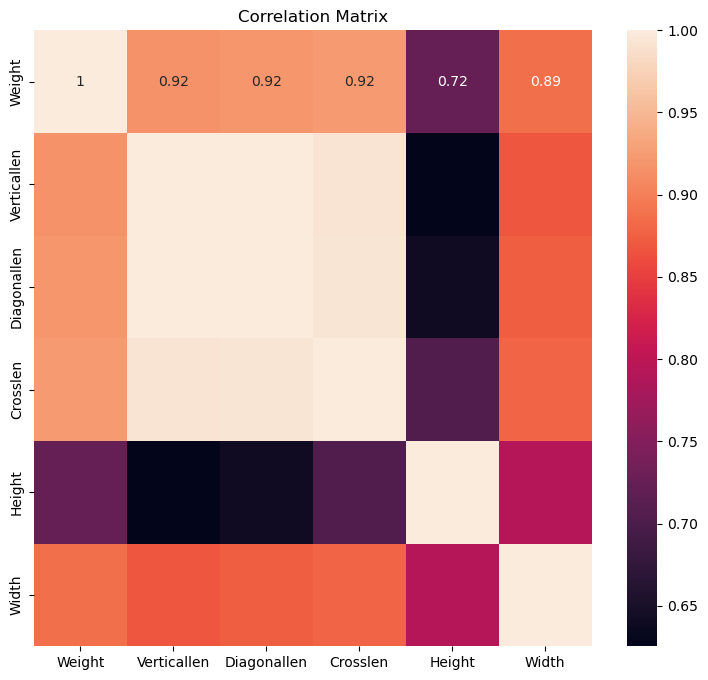

In [7]:
plt.figure(figsize = (9,8)) # Custom figure size in inches
sns.heatmap(df_numeric .corr(), annot =True)
plt.title('Correlation Matrix')

# The correlation between 'VerticalLen', 'DiagonalLen' and 'Crosslen' is almost 1. This may cause 'Multicolinearity'.


In [8]:
df2 = df1.drop(['Verticallen','Diagonallen'], axis = 1)

In [9]:
df2

,Species,Weight,Crosslen,Height,Width
0,Bream,242.0,30.0,11.5200,4.0200
1,Bream,290.0,31.2,12.4800,4.3056
2,Bream,340.0,31.1,12.3778,4.6961
3,Bream,363.0,33.5,12.7300,4.4555
4,Bream,430.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.8,2.2770,1.2558
157,Smelt,19.7,15.2,2.8728,2.0672


In [10]:
df2_numeric = df2.select_dtypes(include = ['float64'])
print(df2_numeric.corr())

            Weight  Crosslen    Height     Width
Weight    1.000000  0.923044  0.724345  0.886507
Crosslen  0.923044  1.000000  0.703409  0.878520
Height    0.724345  0.703409  1.000000  0.792881
Width     0.886507  0.878520  0.792881  1.000000


In [11]:
df2.isna().sum()

Species     0
Weight      0
Crosslen    0
Height      0
Width       0
dtype: int64

C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

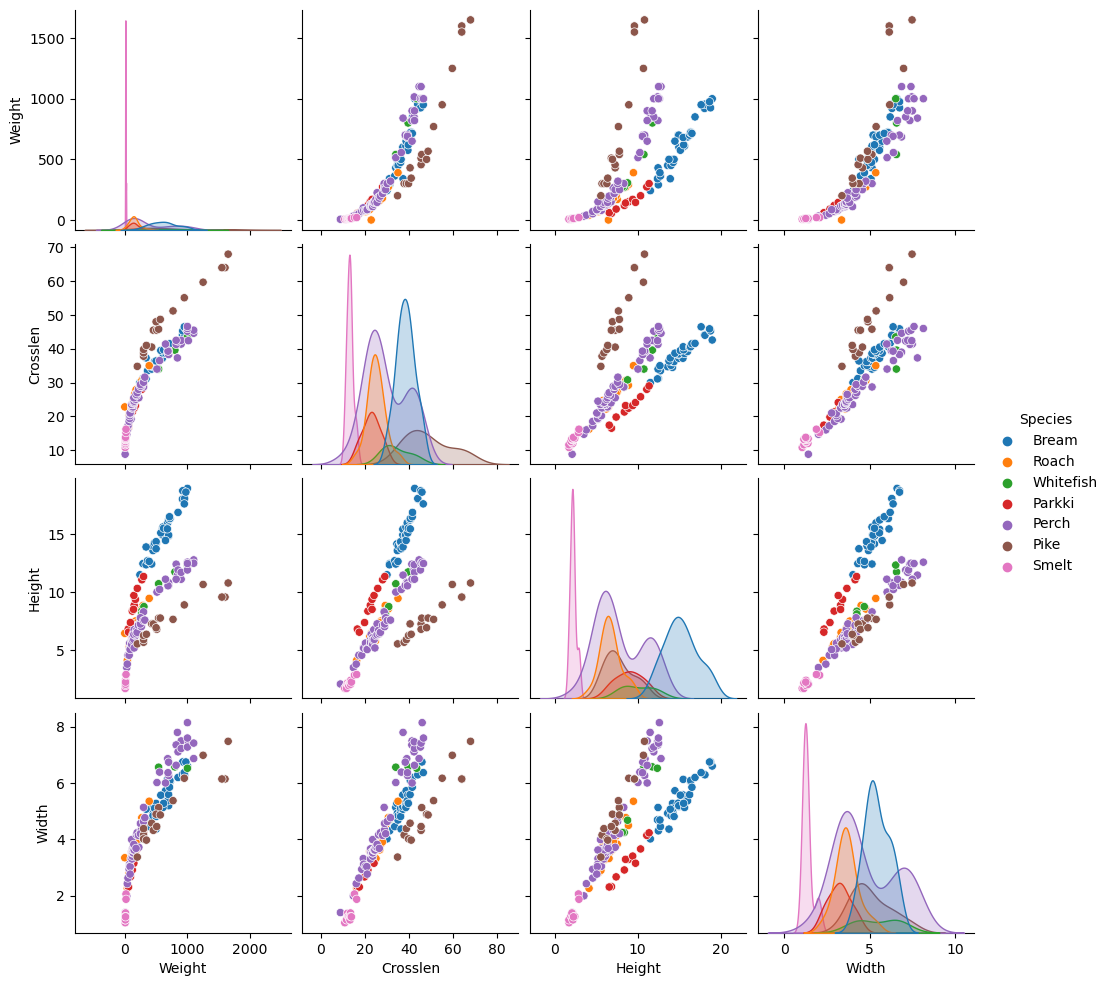

In [12]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

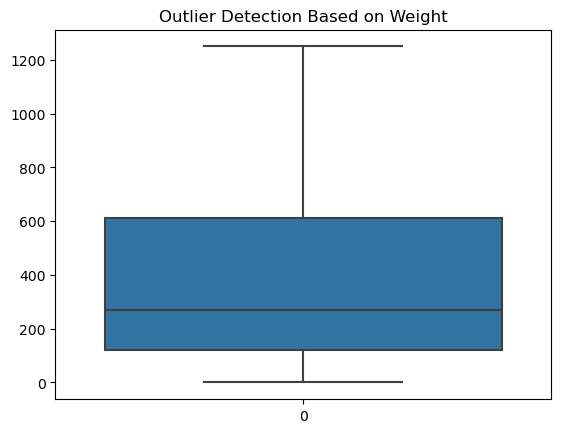

In [30]:
sns.boxplot(data= df2['Weight'] )
plt.title('Outlier Detection Based on Weight')

In [23]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df < lower_end) | (df > upper_end)]
    return outliers

In [24]:
for column in df2.iloc[:,1:]:
    print('\nOutliers in column "%s":' %column)
    print(outlier_detection(df_numeric[column]))


Outliers in column "Weight":
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Crosslen":
144    68.0
Name: Crosslen, dtype: float64

Outliers in column "Height":
Series([], Name: Height, dtype: float64)

Outliers in column "Width":
Series([], Name: Width, dtype: float64)


In [35]:
df2.drop([142,143,144], inplace = True)

In [36]:
for column in df2.iloc[:,1:]:
    print('\nOutliers in column "%s":' %column)
    print(outlier_detection(df_numeric[column]))


Outliers in column "Weight":
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Crosslen":
144    68.0
Name: Crosslen, dtype: float64

Outliers in column "Height":
Series([], Name: Height, dtype: float64)

Outliers in column "Width":
Series([], Name: Width, dtype: float64)


In [37]:
df_Perch = df2[df2.Species == 'Perch']
for column in df_Perch.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Perch[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Crosslen" 
Series([], Name: Crosslen, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Bream Species')

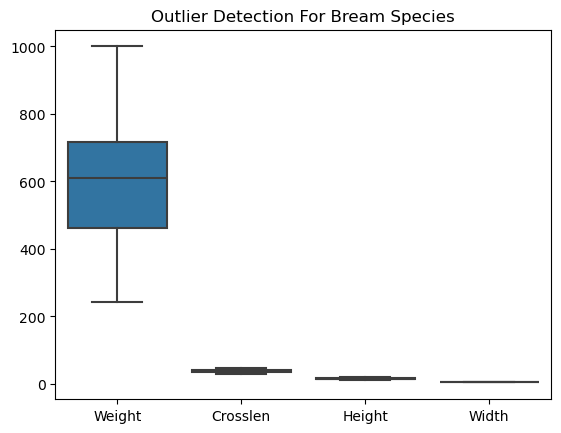

In [40]:
sns.boxplot(data= df2[df2.Species == 'Bream'] )
plt.title('Outlier Detection For Bream Species')

Text(0.5, 1.0, 'Outlier Detection For Pearch Species')

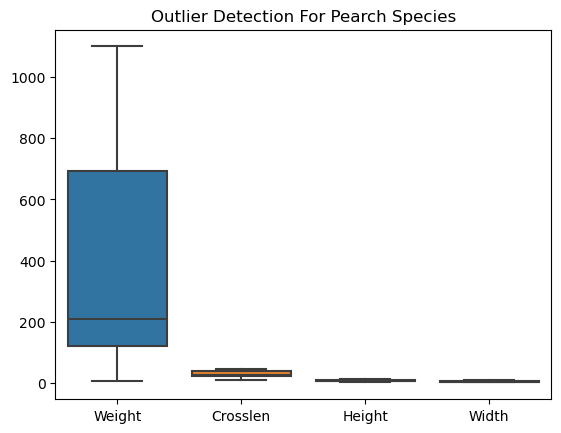

In [41]:
sns.boxplot(data= df2[df2.Species == 'Perch'] )
plt.title('Outlier Detection For Pearch Species')

Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

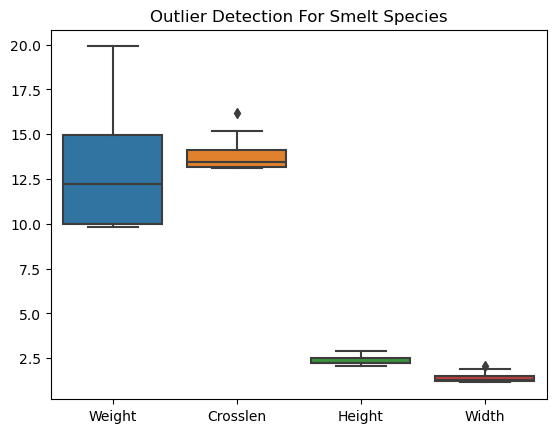

In [73]:
sns.boxplot(data= df2[df2.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [43]:
outlier_detection(df2['Crosslen'])

Series([], Name: Crosslen, dtype: float64)

In [44]:
df_Smelt = df2[df2.Species == 'Smelt']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Crosslen" 
152    16.2
Name: Crosslen, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
151    2.0672
Name: Width, dtype: float64


In [46]:
df3 = df2.drop([35,54])
df3.shape

(148, 5)

In [49]:
df3 = df3[df3['Weight']>=0]

In [52]:
df3[df3['Weight']<=0]

,Species,Weight,Crosslen,Height,Width


In [53]:
df3.drop(40, inplace = True)

KeyError: '[40] not found in axis'

In [54]:
dummy_set = pd.get_dummies(df3['Species'], drop_first = True) 

In [60]:
dummy_set

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
148,0,0,0,0,1,0
149,0,0,0,0,1,0
150,0,0,0,0,1,0
151,0,0,0,0,1,0


In [56]:
df3.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [59]:
dummy_set = dummy_set.astype(int)

In [61]:
df3

,Species,Weight,Crosslen,Height,Width
0,Bream,242.0,30.0,11.5200,4.0200
1,Bream,290.0,31.2,12.4800,4.3056
2,Bream,340.0,31.1,12.3778,4.6961
3,Bream,363.0,33.5,12.7300,4.4555
4,Bream,430.0,34.0,12.4440,5.1340
...,...,...,...,...,...
148,Smelt,12.2,13.4,2.0904,1.3936
149,Smelt,13.4,13.5,2.4300,1.2690
150,Smelt,12.2,13.8,2.2770,1.2558
151,Smelt,19.7,15.2,2.8728,2.0672


In [65]:
df3 = pd.concat([df3,dummy_set],axis = 'columns')

In [66]:
df3

,Species,Weight,Crosslen,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,30.0,11.5200,4.0200,0,0,0,0,0,0
1,Bream,290.0,31.2,12.4800,4.3056,0,0,0,0,0,0
2,Bream,340.0,31.1,12.3778,4.6961,0,0,0,0,0,0
3,Bream,363.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,Bream,430.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
148,Smelt,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
149,Smelt,13.4,13.5,2.4300,1.2690,0,0,0,0,1,0
150,Smelt,12.2,13.8,2.2770,1.2558,0,0,0,0,1,0
151,Smelt,19.7,15.2,2.8728,2.0672,0,0,0,0,1,0


In [67]:
df3.drop(columns = 'Species', inplace = True)

In [68]:
df3

,Weight,Crosslen,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
148,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
149,13.4,13.5,2.4300,1.2690,0,0,0,0,1,0
150,12.2,13.8,2.2770,1.2558,0,0,0,0,1,0
151,19.7,15.2,2.8728,2.0672,0,0,0,0,1,0


In [70]:
x = df3.iloc[:,1:]
x

,Crosslen,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,30.0,11.5200,4.0200,0,0,0,0,0,0
1,31.2,12.4800,4.3056,0,0,0,0,0,0
2,31.1,12.3778,4.6961,0,0,0,0,0,0
3,33.5,12.7300,4.4555,0,0,0,0,0,0
4,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
148,13.4,2.0904,1.3936,0,0,0,0,1,0
149,13.5,2.4300,1.2690,0,0,0,0,1,0
150,13.8,2.2770,1.2558,0,0,0,0,1,0
151,15.2,2.8728,2.0672,0,0,0,0,1,0


In [122]:
y = df3['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
148     12.2
149     13.4
150     12.2
151     19.7
152     19.9
Name: Weight, Length: 147, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [109]:
print(x_train_poly.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 55)
(45, 9)
(102, 1)
(45, 1)


In [120]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [112]:
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
cv = cross_val_score(regressor,x_train,y_train, cv = 4, scoring = 'neg_mean_absolute_error')


In [113]:
print('mae score :', cv)
print('mae score mean :', -np.mean(cv))

mae score : [-67.18233397 -74.20683638 -76.43030387 -57.23469048]
mae score mean : 68.76354117349139


# now using polynomial regressor check the accuracy


In [145]:
regressor = LinearRegression()
cv = cross_val_score(regressor,x_train_poly,y_train, cv =4 , scoring = 'neg_mean_absolute_error')
print('mae score :', cv)
print('mae score mean :', -np.mean(cv))

mae score : [-53.39235461 -43.34491436 -75.36594922 -63.27185938]
mae score mean : 58.84376939128751


In [140]:
print("Type of x_train_poly:", type(x_train_poly))
print("Shape of x_train_poly:", x_train_poly.shape)
print("Type of y_train:", type(y_train))
print("Shape of y_train:", y_train.shape)


Type of x_train_poly: <class 'numpy.ndarray'>
Shape of x_train_poly: (102, 55)
Type of y_train: <class 'pandas.core.frame.DataFrame'>
Shape of y_train: (102, 1)


In [141]:
# Fit the model with the training data
regressor.fit(x_train_poly, y_train)


LinearRegression()

In [142]:
prediction = regressor.predict(x_test_poly)

In [143]:
from sklearn import metrics
print('R2 score:', metrics.r2_score(y_test, prediction))

R2 score: 0.9395635408906328


In [144]:
from sklearn.metrics import mean_absolute_error
print('mae score:', mean_absolute_error(y_test,prediction) )

mae score: 44.58753472222222


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

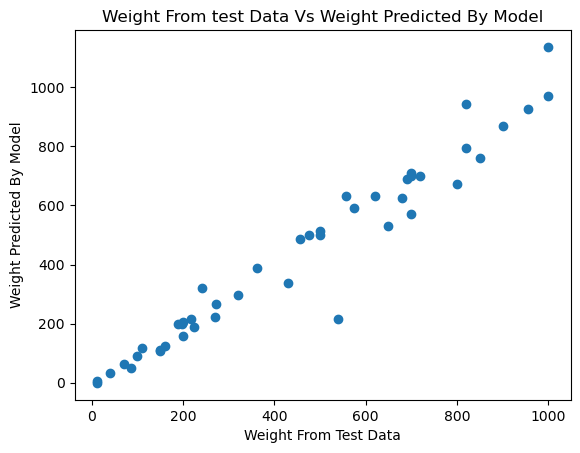

In [147]:
plt.scatter(y_test, prediction)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

In [148]:
predictedWeight = pd.DataFrame(prediction, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Weight,850.000000,900.000000,575.000000,200.000000,720.000000,197.000000,273.000000,200.000000,150.00000,800.00000,...,85.000000,1000.000000,700.000000,430.000000,188.00000,700.00000,456.000000,650.000000,540.000000,12.200000
Predicted Weight,760.426758,870.291016,591.283691,156.906738,698.210938,200.168945,265.936523,206.166504,112.45166,673.38916,...,49.269043,1136.800293,571.092285,337.251465,198.70459,711.18457,485.492676,530.776855,214.956055,5.086426
